In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import os

# Part 1: Returns the period of the expansion sequence.

In [ ]:
def find_period(num_tuple, base):
    """
    input:
    num_tuple: a tuple of two integers, the numerator and denominator of a fraction
    base: the base of the fraction
    output:
    period_length: the length of the period of the fraction
    period: the period sequence of the fraction
    list: the list of the digits in the period
    prefix: the list of the digits before the period
    """
    
    # Extract numerator and denominator from tuple
    numerator, denominator = num_tuple

    # Initialize variables
    quotient = numerator // denominator
    remainder = numerator % denominator
    i = 0
    remainders=[]
    quotient_list=[]
    list=[]
    # Loop until the remainder repeats or becomes zero
    while remainder not in remainders:
        remainders.append(remainder)
        i += 1
        quotient, remainder = divmod(remainder * base, denominator)
        quotient_list.append(quotient)
        list.append(quotient)
        period=''.join(map(str, list))
    period_length=len(remainders)-remainders.index(remainder)
    period=period[-period_length:]
    list=list[-period_length:]
    prefix_length=len(quotient_list)-period_length
    if period=='0':
        period_length=0
        period=''
        list=[]
    return period_length, period,list,quotient_list[:prefix_length]

In [ ]:
find_period((1, 3),10)

In [ ]:
find_period((1, 4),10) # The period of 1/7 in base 10

# Part 2: Find the total length *nsteps*

## Calculate directly

Use the calculate directly when the nsteps is not very large. However, when the nsteps is very large, the function will take a lot of time.

In [ ]:
def find_nsteps(num_tuple, base,nsteps):
    """
    input:
    num_tuple: a tuple of two integers, the numerator and denominator of a fraction
    base: the base of the fraction
    nssteps: the number of steps to take
    output:
    
    """
    min_width = int(math.log10(base-1)) + 1
    
    # Extract numerator and denominator from tuple
    numerator, denominator = num_tuple

    # Initialize variables

    quotient = numerator // denominator
    remainder = numerator % denominator
    i = 0
    list=[]
    # Loop until the remainder repeats or becomes zero
    while i<nsteps:

        i += 1
        quotient, remainder = divmod(remainder * base, denominator)
        quotient=str(quotient).zfill(min_width)
        list.append(quotient)
    return ''.join(map(str, list)), list

In [ ]:
find_nsteps((1, 700),40,100)# The first 1000 digits of 1/700 in base 2

## Use period to calcualte

In [ ]:
def find_nsteps_2(num_tuple, base, nsteps):
    '''
    input:
    num_tuple: a tuple of the form (numerator, denominator)
    base: the base to use for the conversion
    nsteps: the number of digits to compute
    output:
    1. the sequence of nsteps
    2. the sequence of nsteps as a list
    '''
    find_period(num_tuple, base)
    period_length, period, period_list, prefix= find_period(num_tuple, base)
    if nsteps <= period_length+len(prefix):
        t=prefix[:nsteps]+period_list[:nsteps-len(prefix)]
    elif nsteps > period_length+len(prefix):
        t=prefix+period_list*((nsteps-len(prefix))//period_length)+period_list[:(nsteps-len(prefix))%period_length]
    return''.join(map(str, t)), [str(i) for i in t]

# Part 3: Draw the plot

In [ ]:
def draw_path(num_tuple, nsteps):
    """
    If the nsteps is greater than 1000, use find_nsteps function to find the path. 
    However, if the nsteps is less than or equal to 1000, using find_nsteps_2 function to find the path can save time.
    input:
    num_tuple: a tuple of two integers, the numerator and denominator of a fraction
    nsteps: the number of steps to take
    output:
    the plot of the path
    """
    if nsteps>1000:
        num_str, num_list = find_nsteps(num_tuple, 4, nsteps)
    elif nsteps<=1000:
        num_str, num_list = find_nsteps_2(num_tuple,4, nsteps)
    dict={}
    t=1
    location=(0,0)
    for i in num_list:
        if i == "0":
            location=(location[0]+1,location[1])
        elif i == "1":
            location=(location[0],location[1]+1)
        elif i == "2":
            location=(location[0]-1,location[1])
        elif i == "3":
            location=(location[0],location[1]-1)
        dict[t]=location
        t+=1
    x = [v[0] for v in dict.values()]
    y = [v[1] for v in dict.values()]
    i=list(range(1, len(x)+1))
    plt.scatter(x, y, s=10, c=i, cmap=cm.jet)
    plt.show()

In [ ]:
draw_path((23456789012, 1000000000061), 250000)

In [ ]:
draw_path((3624360069,7000000001),250000)

In [ ]:
M = 1049012271677499437486619280565448601617567358491560876166848380843144358447252875551629247027759555570453715679313058783247729772021770818187965906373657674879814228013285920278610192581409571357487047122902674651513128059541953997504202061380373822338959713391954
N = 1612226962694290912940490066273549214229880755725468512353395718465191353017348814314017504539969445479353012064383327267097007933052629203035092097360045095545613659664932507839146477284016238565137429529453089612268152748875615658076162410788075184599421938774835
draw_path((M,N),440)

# Part 4: Return (m,n)

In [ ]:
def from_prefix_period2mn(prefix, period,base):
    '''
    warning: this function can only be used when the base less than 36
    input:
    prefix: the list of prefix 
    period: the list of period
    b: the base
    output:
    tuple of the form (numerator, denominator)
    '''
    if period=="":
        period="0"
    if prefix=="":
        prefix=period
    prefix_length=len(prefix)
    period_length=len(period)
    m=int(prefix,base)*base**period_length+int(period,base)-int(prefix,base)
    n=base**(prefix_length)*(base**period_length-1)

    gcd = math.gcd(m,n)
    return m//gcd, n//gcd
        

In [ ]:
from_prefix_period2mn('3','',10)

# Part 5: Compute rationals (from mage to rationals)

In [ ]:
def plot2point(plot):
    """
    input:
    plot: The plot which is a sample picture.
    output:
    The location of non-white pixels in the plot.
    """
    image = Image.open(plot)
    width, height = image.size
    pixels = list(image.getdata())
    pixels = [pixels[i:i+width] for i in range(0, len(pixels), width)]
    non_white_pixels = []
    if len(pixels[0][0])==3:
        for y in range(height):
            for x in range(width):
                if pixels[y][x] != (255, 255, 255):
                    non_white_pixels.append((x, y))
    elif len(pixels[0][0])==1:
        for y in range(height):
            for x in range(width):
                if pixels[y][x] != (255):
                    non_white_pixels.append((x, y))   
    return non_white_pixels

In [ ]:
def shortest_path(start, end):
    """
    input:
    start: the start point
    end: the end point
    output:
    the shortest path from start to end
    """
    path = []
    current_location = start

    while current_location != end:
        x_diff = abs(end[0] - current_location[0])
        y_diff = abs(end[1] - current_location[1])

        if x_diff > y_diff:
            if current_location[0] < end[0]:
                current_location = (current_location[0] + 1, current_location[1])
                path.append("0")
            else:
                current_location = (current_location[0] - 1, current_location[1])
                path.append("2")
        else:
            if current_location[1] < end[1]:
                current_location = (current_location[0], current_location[1] + 1)
                path.append("3")
            else:
                current_location = (current_location[0], current_location[1] - 1)
                path.append("1")

    return ''.join(path)

In [ ]:
def distance(point1, point2):
    '''
    input:
    point1: the first point
    point2: the second point
    output:
    the distance suqare between point1 and point2
    '''
    x1, y1 = point1
    x2, y2 = point2
    return (x2-x1)**2 + (y2-y1)**2
def nearest_neighbor(points):
    '''
    input:
    points: the list of points
    output:
    the path of the points as the order of the nearest neighbor
    '''
    path = [points[0]]
    unvisited = points[1:]
    path_number=[]
    while unvisited:
        last_point = path[-1]
        next_point = min(unvisited, key=lambda point: distance(last_point, point))
        path_num=shortest_path(last_point,next_point)
        path_number.append(path_num)
        path.append(next_point)
        unvisited.remove(next_point)
    return path , path_number


In [33]:
a=plot2point('example1.png')

In [34]:
path_point,path23 = nearest_neighbor(a)
ordered_points = {index: value for index, value in enumerate(path_point)}
path23=''.join(path23)

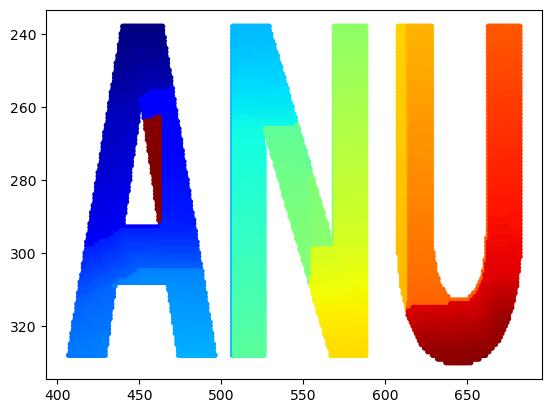

In [35]:
# The orginal picture(ordered by the order of the nearest neighbor)
x = [v[0] for v in ordered_points.values()]
y = [v[1] for v in ordered_points.values()]
i=list(range(1, len(x)+1))
fig, ax = plt.subplots()
plt.scatter(x, y, s=10, c=i, cmap=cm.jet)
ax.invert_yaxis()  # Invert the y-axis
plt.show()

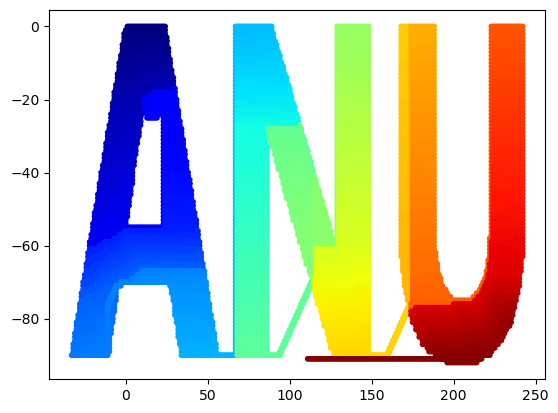

In [36]:
# The picture drwan by the M and N
k1,k2=from_prefix_period2mn('',path23,4)
draw_path((k1,k2),len(path23)*(9800/10000))

In [37]:
k1,k2

(953746058831009109327039342032553818826602944205875322986380855444290804713832271699042595466997046858796389865856537491358654297025910073606146323089790205588309380815279584204655619952275288432565366354241082878864371808424741624098238273170746819515378489266376179355445211317228434413993340874838014065940554051616051025325314838945678989707485269462520160740139370358969563752148573473685798158200466523370069006897987885560721418801156221958309158928983737386238833016048769906397095632574629255935121041902055457688526443600409298225038623657677934737967655006769400614829855352514433898600142430274293687616923385004667666246244402933388560195547512281819980396586537577341273356693088832607041121753761763488858839743776828636269570131335035117733553881580706125453067487146988857552940487351161770604182122550443799380512636563163312573070404254086002878495641143185036922380561219210948435245627472599591905274997745591374344714222428576709540517262012668493874147640055795986646584586462

So, the tuple of M and N is k1 and k2 writen the image of ANU.

In [ ]:
# def __main__():
#     while True:
#         print("The test function:")
#         print("1. find_period")
#         print("2. find_nsteps")
#         print("3. find_nsteps_2")
#         print("4. draw_path")
#         print("5. from_prefix_period2mn")
#         print("6. plot2point")
#         print("0. quit")

#         choice = int(input("please input the number"))

#         if choice == 1:
#             num_tuple = tuple(map(int, input("please input num_tuple(2 number):").split(',')))
#             base = int(input("please input base:"))
#             result = find_period(num_tuple, base)[1]
#             print(f"result：{result}")

#         elif choice == 2:
#             num_tuple = tuple(map(int, input("please input num_tuple(2 number):").split(',')))
#             base = int(input("please input base:"))
#             nsteps = int(input("please input nsteps："))
#             result = find_nsteps(num_tuple, base, nsteps)[0]
#             print(f"result：{result}")

#         elif choice == 3:
#             num_tuple = tuple(map(int, input("please input num_tuple(2 number):").split(',')))
#             base = int(input("please input base:"))
#             nsteps = int(input("please input nsteps："))
#             result = find_nsteps_2(num_tuple, base, nsteps)[0]
#             print(f"result：{result}")

#         elif choice == 4:
#             num_tuple = tuple(map(int, input("please input num_tuple(2 number):").split(',')))
#             nsteps = int(input("please input nsteps："))
#             draw_path(num_tuple, nsteps)

#         elif choice == 5:
#             prefix = input("please input prefix：")
#             period = input("please input period：")
#             base = int(input("please input base:"))
#             result = from_prefix_period2mn(prefix, period, base)
#             print(f"result：{result}")

#         elif choice == 6:
#             plot = input("please input the loaction of the picture:")
#             point=plot2point(plot)
#             path_point,path = nearest_neighbor(point)
#             ordered_points = {index: value for index, value in enumerate(path_point)}
#             path=''.join(path)
#             result = from_prefix_period2mn('',path,4)
#             print(f"result：{result}")


#         elif choice == 0:
#             break

#         else:
#             print("Error")
# __main__()